In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

Data from the Bureau of Labor Statistics on [Total Monthly Employment Numbers](https://data.bls.gov/pdq/SurveyOutputServlet).

In [4]:
CSV_PATH = os.path.join('..', 'data_raw', 'employment_all_in_thousands.xlsx')
df = pd.read_excel(CSV_PATH, skiprows=12)
df.head(15)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,109197,109435,109644,109688,109839,109857,109824.0,109617.0,109520.0,109367.0,109213.0,109167.0
1,1991,109056,108735,108576,108367,108251,108337,108292.0,108313.0,108338.0,108357.0,108297.0,108330.0
2,1992,108372,108313,108368,108523,108652,108719,108794.0,108929.0,108963.0,109144.0,109277.0,109499.0
3,1993,109799,110047,109999,110302,110573,110752,111057.0,111211.0,111452.0,111737.0,111990.0,112319.0
4,1994,112601,112785,113248,113592,113928,114242,114613.0,114902.0,115251.0,115464.0,115876.0,116171.0
5,1995,116508,116702,116913,117076,117056,117293,117386.0,117642.0,117881.0,118038.0,118182.0,118328.0
6,1996,118323,118744,119001,119168,119496,119778,120020.0,120207.0,120418.0,120674.0,120969.0,121152.0
7,1997,121372,121682,121999,122296,122557,122825,123119.0,123099.0,123594.0,123940.0,124246.0,124559.0
8,1998,124823,125024,125174,125453,125855,126087,126213.0,126551.0,126764.0,126968.0,127243.0,127607.0
9,1999,127713,128131,128239,128610,128822,129099,129420.0,129576.0,129781.0,130190.0,130479.0,130786.0


In [5]:
employment = df.melt(id_vars=['Year'])
employment.dropna(inplace=True)
employment['value'] = employment['value'].astype('int64')
employment['Year'] = employment['Year'].astype(str)
employment['date'] = employment['variable'] + ' 15, ' + employment['Year']
employment['date'] = pd.to_datetime(employment['date'], format='%b %d, %Y')
employment = employment.set_index('date').sort_index()

In [8]:
employment.head()

,Year,variable,value
date,,,
1990-01-15,1990,Jan,109197
1990-02-15,1990,Feb,109435
1990-03-15,1990,Mar,109644
1990-04-15,1990,Apr,109688
1990-05-15,1990,May,109839


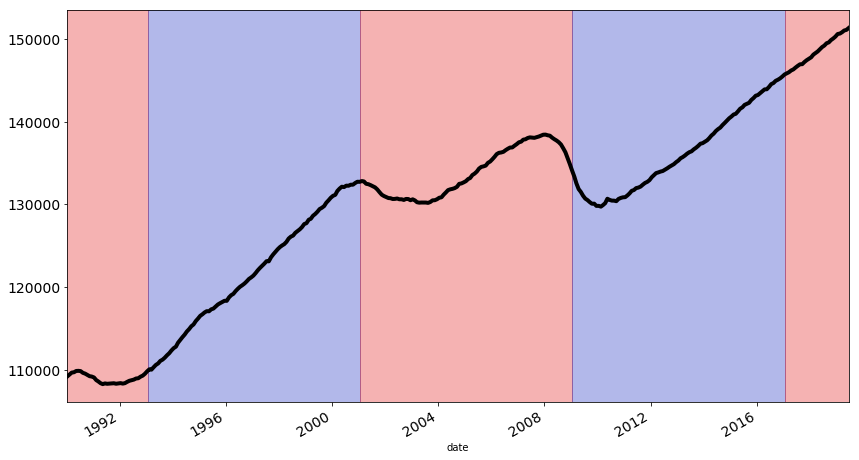

In [10]:
ax = employment.loc[:, 'value'].plot(figsize=(14, 8), linewidth=4, color='black', 
                     label='Employment (in thousands)')
ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2020', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)


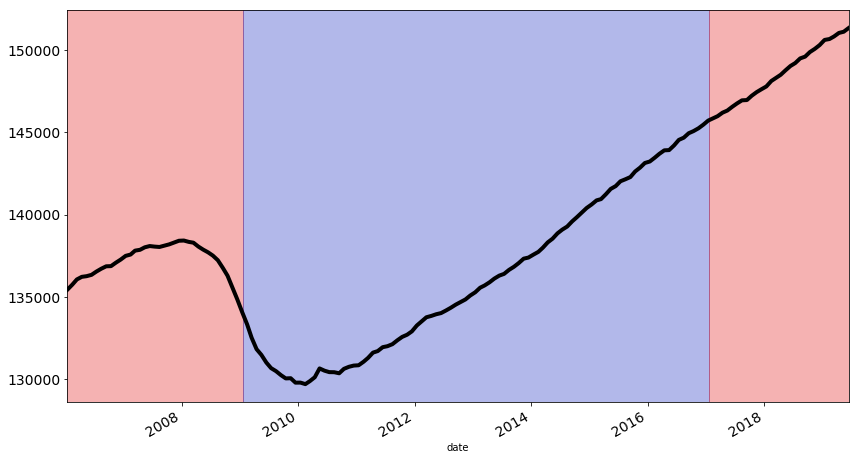

In [11]:
ax = employment.loc['2006':'2020', 'value'].plot(figsize=(14, 8), linewidth=4, color='black', 
                     label='Employment (in thousands)')
ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2020', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)


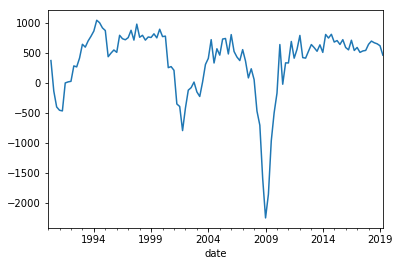

In [12]:
employment['value'].resample('Q').mean().diff().plot()

In [153]:
# emp_df.loc['1996':'2015', 'value']

In [13]:
emp_diff = employment.loc['1996':'2015', 'value'].diff()

In [14]:
emp_diff.head()

date
1996-01-15      NaN
1996-02-15    421.0
1996-03-15    257.0
1996-04-15    167.0
1996-05-15    328.0
Name: value, dtype: float64

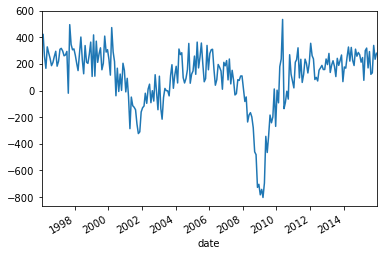

In [15]:
emp_diff['1990':'2020'].plot()

Wow! 

Text(0.5, 0, 'Date')

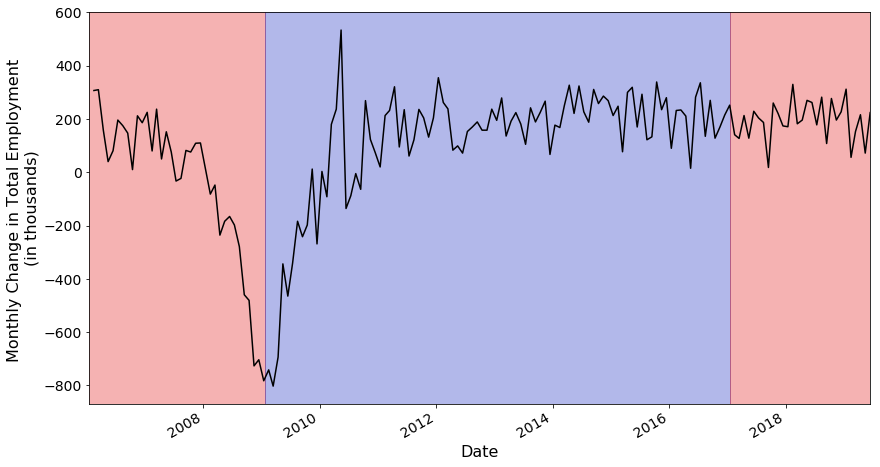

In [20]:
start_date = '2006-01-01'
end_date = '2020-12-31'
fs = 16

emp_diff = employment.loc[start_date: end_date, 'value'].diff()
ax = emp_diff[start_date: end_date].plot(x='date', y='value', figsize=(14, 8), linewidth=1.5, color='black', 
                     label='Employment (in thousands)')

ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2020', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.set_ylabel('Monthly Change in Total Employment \n(in thousands)', fontsize=fs)
ax.set_xlabel('Date', fontsize=fs)

In [26]:
def monthly_change(df, start_date, end_date, fs):
    ax = df.loc[start_date: end_date, 'value'].diff().plot(figsize=(14, 8), 
                                                           linewidth=1.5, 
                                                           color='black', 
                                                           label='Employment (in thousands)')
    ax.tick_params(labelsize=14)
    ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
               datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
               color='#de0100', lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
               datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
               color='#0015bc', lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
               datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
               color='#de0100', lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
               datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
               color='#0015bc', lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
               datetime.strptime('Jan 20, 2020', '%b %d, %Y'), 
               color='#de0100', lw=1, alpha=0.3)
    ax.set_ylabel('Monthly Change in Total Employment \n(in thousands)', fontsize=fs)
    ax.set_xlabel('Date', fontsize=fs)

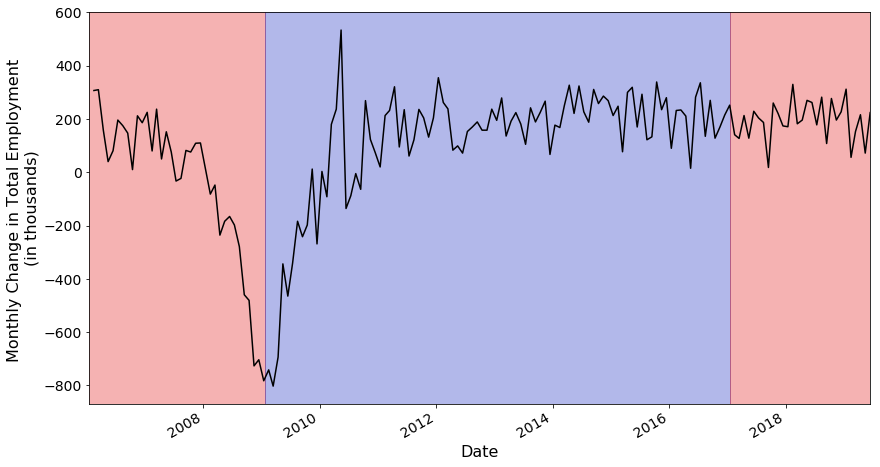

In [27]:
monthly_change(employment, start_date='2006-01-01', end_date='2020-12-31', fs=16)

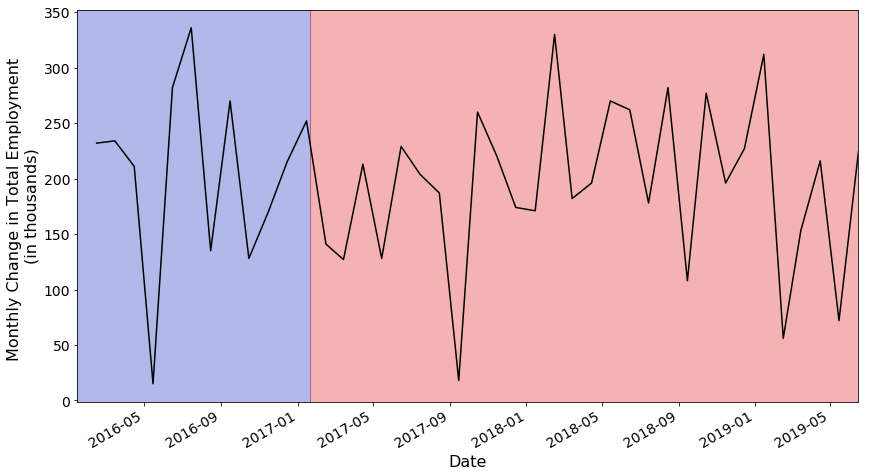

In [28]:
monthly_change(employment, start_date='2016-01-01', end_date='2020-12-31', fs=16)